# 1)                                                                                                                                            Using 5star_hotel_sentiment file, for each hotel, calculate its overall average sentiment score, using ave_sentiment 

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import spacy
import nltk
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\M S
[nltk_data]     I\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df= pd.read_csv('5star_hotel_sentiment.csv',encoding='ISO-8859-1')
df.head()

,doc_id,Review,Hotel_Name,Date_of_review,Rating,Title,Date_of_stay,Trip_type,Room_Tip,element_id,word_count,sd,ave_sentiment,pre_sentiment
0,1,Here we are again with friends. Lost count no...,Royal Plaza on Scotts,19-Jan,5,Just a great hotel,19-Jan,NaN,NaN,1,135,0.334690,0.477461,1
1,2,Just spent a few days here. The hotel has been...,Royal Plaza on Scotts,19-Jan,4,Adequate,19-Jan,NaN,NaN,2,54,0.245333,0.334735,1
2,3,Decided to have a small Birthday celebration f...,Royal Plaza on Scotts,19-Jan,5,January babies,19-Jan,NaN,NaN,3,78,0.346992,0.449312,1
3,4,Great location city center on the orchard road...,Royal Plaza on Scotts,19-Jan,5,Great location,19-Jan,NaN,NaN,4,57,0.482390,0.278205,1
4,5,Being colour blind helped in the fact I couldn...,Royal Plaza on Scotts,19-Jan,3,Not for the price,19-Jan,NaN,NaN,5,79,0.366671,0.222669,1


In [4]:
df.shape

(17297, 14)

# Data Cleaning Start from here!

In [5]:
df["Rating"].value_counts() #Checks the rating values in case there is a weird value

5    13035
4     2687
3      854
1      362
2      359
Name: Rating, dtype: int64

In [6]:
df.isnull().sum()

doc_id                0
Review                0
Hotel_Name            0
Date_of_review        0
Rating                0
Title                 0
Date_of_stay         11
Trip_type         17297
Room_Tip          17297
element_id            0
word_count            0
sd                  340
ave_sentiment         0
pre_sentiment         0
dtype: int64

In [7]:
df.loc[df["Review"] == ""] #Checks for empty review strings

,doc_id,Review,Hotel_Name,Date_of_review,Rating,Title,Date_of_stay,Trip_type,Room_Tip,element_id,word_count,sd,ave_sentiment,pre_sentiment


#Applying the Sentiment and Rating because average sentiment depend on both

In [8]:
pos = [5]
neg = [1, 2]
neu = [3, 4]

def sentiment(rating):
  if rating in pos:
    return 2
  elif rating in neg:
    return 0
  else:
    return 1  
df['Sentiment'] = df['Rating'].apply(sentiment)
df.head()

,doc_id,Review,Hotel_Name,Date_of_review,Rating,Title,Date_of_stay,Trip_type,Room_Tip,element_id,word_count,sd,ave_sentiment,pre_sentiment,Sentiment
0,1,Here we are again with friends. Lost count no...,Royal Plaza on Scotts,19-Jan,5,Just a great hotel,19-Jan,NaN,NaN,1,135,0.334690,0.477461,1,2
1,2,Just spent a few days here. The hotel has been...,Royal Plaza on Scotts,19-Jan,4,Adequate,19-Jan,NaN,NaN,2,54,0.245333,0.334735,1,1
2,3,Decided to have a small Birthday celebration f...,Royal Plaza on Scotts,19-Jan,5,January babies,19-Jan,NaN,NaN,3,78,0.346992,0.449312,1,2
3,4,Great location city center on the orchard road...,Royal Plaza on Scotts,19-Jan,5,Great location,19-Jan,NaN,NaN,4,57,0.482390,0.278205,1,2
4,5,Being colour blind helped in the fact I couldn...,Royal Plaza on Scotts,19-Jan,3,Not for the price,19-Jan,NaN,NaN,5,79,0.366671,0.222669,1,1


In [9]:
# Percentage of each column

In [10]:
totals = df.isnull().sum().sort_values(ascending=False)
percentage = totals/len(df)*100
pd.concat([totals,percentage], axis=1, keys=['Total','Percent']).head(7)

,Total,Percent
Trip_type,17297,100.000000
Room_Tip,17297,100.000000
sd,340,1.965659
Date_of_stay,11,0.063595
doc_id,0,0.000000
Review,0,0.000000
Hotel_Name,0,0.000000


# Cleaning

In [11]:
from nltk.corpus import stopwords
stopwords_list = set(stopwords.words("english"))
punctuations = """!()-![]{};:,+'"\,<>./?@#$%^&*_~Â""" #List of punctuation to remove

def reviewParse(review):
    splitReview = review.split() #Split the review into words
    parsedReview = " ".join([word.translate(str.maketrans('', '', punctuations)) + " " for word in splitReview]) #Takes the stubborn punctuation out
    return parsedReview #Returns the parsed review
  
def clean_review(review):
    clean_words = []
    splitReview = review.split()
    for w in splitReview:
        if w.isalpha() and w not in stopwords_list:
            clean_words.append(w.lower())
    clean_review = " ".join(clean_words)
    return clean_review

df["Review"] = df["Review"].apply(reviewParse).apply(clean_review) #Parse all the reviews for their punctuation and add it into a new column

df.head() #Take a peek at the dataset

,doc_id,Review,Hotel_Name,Date_of_review,Rating,Title,Date_of_stay,Trip_type,Room_Tip,element_id,word_count,sd,ave_sentiment,pre_sentiment,Sentiment
0,1,here friends lost count many times stayed roya...,Royal Plaza on Scotts,19-Jan,5,Just a great hotel,19-Jan,NaN,NaN,1,135,0.334690,0.477461,1,2
1,2,just spent days the hotel refurbished nice apt...,Royal Plaza on Scotts,19-Jan,4,Adequate,19-Jan,NaN,NaN,2,54,0.245333,0.334735,1,1
2,3,decided small birthday celebration wife younge...,Royal Plaza on Scotts,19-Jan,5,January babies,19-Jan,NaN,NaN,3,78,0.346992,0.449312,1,2
3,4,great location city center orchard road good c...,Royal Plaza on Scotts,19-Jan,5,Great location,19-Jan,NaN,NaN,4,57,0.482390,0.278205,1,2
4,5,being colour blind helped fact i couldnt tell ...,Royal Plaza on Scotts,19-Jan,3,Not for the price,19-Jan,NaN,NaN,5,79,0.366671,0.222669,1,1


In [12]:
docs = list(df['Review'])[:7000]

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer 
 
# settings that you use for count vectorizer will go here 
tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_features = 20000) 
 
# just send in all your docs here 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(docs)

In [14]:
X = tfidf_vectorizer_vectors.toarray()
Y = df['Sentiment'][:7000]

In [15]:
len(X[0])

16386

In [16]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score,roc_curve,auc
from sklearn.tree import DecisionTreeClassifier

SEED=123

X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=SEED, stratify=Y)

# Start from here the average sentiment score through Decision tree, Logistic Regression, and Random forest

In [17]:
dt = DecisionTreeClassifier(random_state=SEED)
dt.fit(X_train,y_train)
y_pred_test = dt.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,dt.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,dt.predict(X_test)),4)))

Training Accuracy score: 0.9998
Testing Accuracy score: 0.6514


In [18]:
print(classification_report(y_test, y_pred_test, target_names=['positive', 'neutral', 'negative']))

              precision    recall  f1-score   support

    positive       0.20      0.14      0.17        70
     neutral       0.37      0.36      0.37       348
    negative       0.77      0.79      0.78       982

    accuracy                           0.65      1400
   macro avg       0.45      0.43      0.44      1400
weighted avg       0.64      0.65      0.65      1400



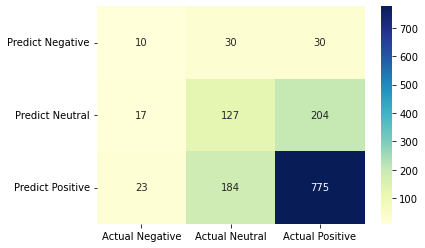

In [19]:
cm = confusion_matrix(y_test, y_pred_test)
#print('Confusion matrix\n', cm)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'], 
                        index=['Predict Negative', 'Predict Neutral', 'Predict Positive'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [20]:
#Logistic Regression 

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=SEED).fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,lr.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,lr.predict(X_test)),4)))

Training Accuracy score: 0.8761
Testing Accuracy score: 0.7636


In [22]:
print(classification_report(y_test, y_pred_test, target_names=['positive', 'neutral', 'negative']))

              precision    recall  f1-score   support

    positive       0.44      0.06      0.10        70
     neutral       0.59      0.37      0.45       348
    negative       0.80      0.95      0.87       982

    accuracy                           0.76      1400
   macro avg       0.61      0.46      0.47      1400
weighted avg       0.73      0.76      0.73      1400



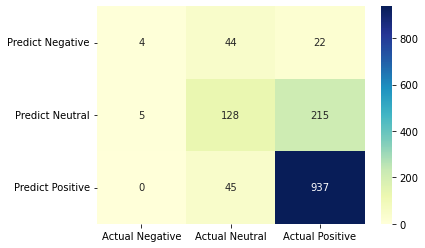

In [23]:
cm = confusion_matrix(y_test, y_pred_test)
#print('Confusion matrix\n', cm)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'], 
                        index=['Predict Negative', 'Predict Neutral', 'Predict Positive'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [24]:
#Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,clf.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,clf.predict(X_test)),4)))

Training Accuracy score: 0.9998
Testing Accuracy score: 0.7229


In [26]:
print(classification_report(y_test, y_pred_test, target_names=['positive', 'neutral', 'negative']))

              precision    recall  f1-score   support

    positive       1.00      0.01      0.03        70
     neutral       0.65      0.10      0.18       348
    negative       0.73      0.99      0.84       982

    accuracy                           0.72      1400
   macro avg       0.79      0.37      0.35      1400
weighted avg       0.72      0.72      0.63      1400



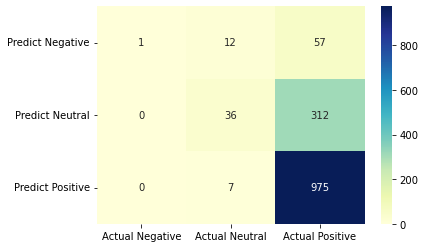

In [27]:
cm = confusion_matrix(y_test, y_pred_test)
#print('Confusion matrix\n', cm)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Negative', 'Actual Neutral', 'Actual Positive'], 
                        index=['Predict Negative', 'Predict Neutral', 'Predict Positive'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [28]:
#Ensemble of both the Decision and Logistic Regression

In [29]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Decision Tree', dt),
               ('Logistic Regression', lr),
               
              ]
vc = VotingClassifier(estimators=classifiers)
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)

print("Training Accuracy score: "+str(round(accuracy_score(y_train,vc.predict(X_train)),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,vc.predict(X_test)),4)))

Training Accuracy score: 0.9889
Testing Accuracy score: 0.6807


                                                     # End 

In [30]:
# Part 1: Finding avgerage sentiment for each hotel
df_ave=df.groupby('Hotel_Name')['ave_sentiment'].mean()
df_ave= df_ave.to_frame().reset_index()
df_ave

,Hotel_Name,ave_sentiment
0,Ascott Raffles Place Singapore,0.385506
1,Conrad Centennial Singapore,0.330505
2,Fairmont Singapore,0.344674
3,Four Seasons Hotel Singapore,0.330518
4,Fraser Suites Singapore,0.362654
5,Goodwood Park Hotel,0.367500
6,Grand Copthorne Waterfront,0.362740
7,Grand Hyatt Singapore,0.332690
8,Grand Park City Hall,0.353166
9,Hotel Fort Canning,0.359431


## 2) Using 5star_hotel_review_2020, need to calculate total number of reviews for each hotel. 

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#sentiments = SentimentIntensityAnalyzer()

df_2020 = pd.read_csv('5star_hotel_review_2020.csv', encoding='ISO-8859-1')
df_2020

,HotelName,Date of review,Rating,Title,Description,Date of stay,Trip type,Room Tip
0,Royal Plaza on Scotts,Jan-20,5,Great hotel great location,My wife and I stayed here for 3 nights and gav...,Jan-20,Travelled as a couple,NaN
1,Royal Plaza on Scotts,Apr-20,3,Staycation during Covid-19,We booked a one night stay at this hotel to ch...,Mar-20,Travelled as a couple,NaN
2,Royal Plaza on Scotts,Jan-20,3,What a let Down!,This is not the first time my husband and I ch...,Dec-19,NaN,NaN
3,Royal Plaza on Scotts,Feb-20,5,What the Duck Staycation!!!,Value for money deal not to be missed by Singa...,Feb-20,NaN,NaN
4,Royal Plaza on Scotts,Feb-20,5,Pleasant Layover in Royal Plaza on Scotts,"Overall, very happy with my choice of hotel. I...",Feb-20,NaN,NaN
...,...,...,...,...,...,...,...,...
7194,The Fullerton Hotel Singapore,Mar-20,5,Trip to Town Restaurant,We had an awesome dining experience at Town Re...,Mar-20,NaN,NaN
7195,The Fullerton Hotel Singapore,Mar-20,5,Great dining experience at Town Restaurant. Fa...,"Good service by Garan, Josephine and Joppy. Th...",Mar-20,NaN,NaN
7196,The Fullerton Hotel Singapore,Mar-20,5,Town Restaurant Dinner Buffet,This is my 2nd time in this year returning to ...,Mar-20,NaN,NaN
7197,The Fullerton Hotel Singapore,Mar-20,5,Best skybar ever!,"Giri, Raffy and the crew made us feel at home ...",Mar-20,NaN,NaN


In [32]:
#Visualizaing the rating the Rating through a Pie Chart

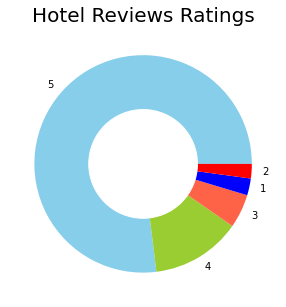

In [33]:
ratings = df_2020["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Hotel Reviews Ratings", fontsize=20)
plt.show()

In [34]:
# Calculating total number of reviews for each hotel
df_total_reviews=df_2020.groupby('HotelName')['Rating'].count()
df_total_reviews= df_total_reviews.to_frame().reset_index()
df_total_reviews

,HotelName,Rating
0,Ascott Raffles Place Singapore,33
1,Conrad Centennial Singapore,118
2,Dusit Thani Laguna Singapore,20
3,Fairmont Singapore,332
4,Four Seasons Hotel Singapore,68
5,Fraser Suites Singapore,14
6,Goodwood Park Hotel,56
7,Grand Copthorne Waterfront,138
8,Grand Hyatt Singapore,300
9,Grand Park City Hall,276


## 3 and 4) Merging average sentiment score and total 2020 reviews with 5star_hotel_info.

In [35]:
df_info= pd.read_csv('5star_hotel_info.csv', encoding='ISO-8859-1')
df_info.head()

,Hotel Name,Nearby MRT Station,"Number of Competitors, based on the closest MRT and hotel class",Number of Platform in total,Hotels.com,Orbitz.com,Agoda.com,Booking.com,Expedia.com,ZenHotels.com,Travelocity,eDreams,Priceline,FindHotel,Destinia.com,Trip.com,Etrip,getaroom.com,Prestigia.com,Hotel Class rating
0,Ascott Raffles Place Singapore,"Raffles Place, Downtown",4,14,T,T,T,T,T,T,T,T,T,T,T,T,T,F,T,5
1,Conrad Centennial Singapore,Promenade,4,14,T,T,T,T,T,F,T,T,T,T,T,T,T,T,T,5
2,Fairmont Singapore,City Hall,4,14,T,T,T,T,T,T,T,T,T,T,T,T,T,F,T,5
3,Four Seasons Hotel Singapore,Orchard,9,13,T,T,T,T,T,T,T,T,T,T,T,T,T,F,F,5
4,Fraser Suites Singapore,Tiong Bahru,0,12,T,T,T,T,T,F,T,T,T,T,F,T,T,F,T,5


In [36]:
#merging the datasets

In [37]:
# Renameing columns
df_info.rename(columns = {'Hotel Name':'Hotel_Name'}, inplace = True)
df_total_reviews.rename(columns = {'HotelName':'Hotel_Name'}, inplace = True)

In [38]:
# Merging columns
df_merge = df_info.merge(df_ave, on='Hotel_Name')
df_merge =  df_merge.merge(df_total_reviews,on='Hotel_Name')

In [39]:
# Removing Rows according to the requiremtns
df_merge= df_merge.drop(labels=[16,39], axis=0)
df_merge.reset_index(drop=True, inplace=True)

In [40]:
# Droping Unnecessary columns
df_merge.drop(['Hotel_Name','Nearby MRT Station','Hotel Class rating'], inplace=True, axis=1)

In [41]:
df_merge

,"Number of Competitors, based on the closest MRT and hotel class",Number of Platform in total,Hotels.com,Orbitz.com,Agoda.com,Booking.com,Expedia.com,ZenHotels.com,Travelocity,eDreams,Priceline,FindHotel,Destinia.com,Trip.com,Etrip,getaroom.com,Prestigia.com,ave_sentiment,Rating
0,4,14,T,T,T,T,T,T,T,T,T,T,T,T,T,F,T,0.385506,33
1,4,14,T,T,T,T,T,F,T,T,T,T,T,T,T,T,T,0.330505,118
2,4,14,T,T,T,T,T,T,T,T,T,T,T,T,T,F,T,0.344674,332
3,9,13,T,T,T,T,T,T,T,T,T,T,T,T,T,F,F,0.330518,68
4,0,12,T,T,T,T,T,F,T,T,T,T,F,T,T,F,T,0.362654,14
5,9,13,T,T,T,T,T,F,T,T,F,T,T,T,T,T,T,0.367500,56
6,0,14,T,T,T,T,T,T,T,T,T,T,T,T,T,T,F,0.362740,138
7,9,10,T,T,T,T,T,F,T,F,F,T,F,T,T,F,T,0.332690,300
8,4,12,T,T,F,T,T,T,T,T,T,T,T,T,T,F,F,0.353166,276
9,0,13,T,T,T,T,T,F,T,T,T,T,T,T,T,F,T,0.359431,52


#  5) Now with all the inputs and target available, perform predictive model and k-fold 5 and 10

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score,roc_curve,auc
from sklearn.tree import DecisionTreeClassifier
model=LinearRegression(fit_intercept=True)

In [43]:
Y = df_merge.Rating

In [44]:
df_merge.columns

Index(['Number of Competitors, based on the closest MRT and hotel class',
       'Number of Platform in total', 'Hotels.com', 'Orbitz.com', 'Agoda.com',
       'Booking.com', 'Expedia.com', 'ZenHotels.com', 'Travelocity', 'eDreams',
       'Priceline', 'FindHotel', 'Destinia.com', 'Trip.com', 'Etrip',
       'getaroom.com', 'Prestigia.com', 'ave_sentiment', 'Rating'],
      dtype='object')

In [45]:
features=['Number of Competitors, based on the closest MRT and hotel class',
       'Number of Platform in total', 'Hotels.com', 'Orbitz.com', 'Agoda.com',
       'Booking.com', 'Expedia.com', 'ZenHotels.com', 'Travelocity', 'eDreams',
       'Priceline', 'FindHotel', 'Destinia.com', 'Trip.com', 'Etrip',
       'getaroom.com', 'Prestigia.com', 'ave_sentiment']

In [46]:
X = df_merge[features]
X.replace({'T': 1, 'F': 0}, inplace=True)

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.36,random_state=12)

In [48]:
# Fitting Linear Regression 
model = LinearRegression()
model.fit(X_train,Y_train)
y_predictions = model.predict(X_test)

In [51]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_predictions)))

Mean Absolute Error: 204.52334180944797
Mean Squared Error: 81061.70626820993
Root Mean Squared Error: 284.7133756398001


In [52]:
# Fitting Random Forest Regression 
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data
regressor.fit(X_train, Y_train)
yr_predictions = regressor.predict(X_test)

In [53]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, yr_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, yr_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, yr_predictions)))

Mean Absolute Error: 147.638
Mean Squared Error: 47059.281796
Root Mean Squared Error: 216.93151406838058


In [55]:
#Fitting Logistic Regression 
from sklearn.linear_model import LogisticRegression  
LR= LogisticRegression(random_state=0)  
LR.fit(X_train, Y_train)  
yp = LR.predict(X_test)

In [56]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, yp))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, yp))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, yp)))

Mean Absolute Error: 135.48
Mean Squared Error: 31304.76
Root Mean Squared Error: 176.9315121734961


# k-fold 5 and 10

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [58]:
#cross-validation scores 5
cv_scores1 = cross_val_score(regressor,X_train,Y_train,cv = 5)

In [59]:
#cross-validation scores 10
cv_scores2 = cross_val_score(regressor,X_train,Y_train,cv = 10)

In [60]:
# Print the 5-fold cross-validation scores
print(cv_scores1)

[ 0.36336221 -2.04435859 -0.10440708 -0.51921945 -5.35965661]


In [61]:
print(cv_scores2)

[ 3.42209763e-01 -4.00879041e+02 -1.55928525e-01             nan
             nan             nan             nan             nan
             nan             nan]


In [62]:
print("Average CV Score: {}".format(np.mean(cv_scores1)))

Average CV Score: -1.5328559056538982


In [63]:
print("Average CV Score: {}".format(np.mean(cv_scores2)))

Average CV Score: nan
